**TASK2**
**EDA ANALYSIS**

*Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice,such as the Tata dataset.
Explore the relationships between variables and identify patterns and trends in the data.*



*1.Load and inspect the data set.*

In [1]:
import pandas as pd

# Load your dataset
df = pd.read_csv('tata.csv')  # Replace with actual filename

# Overview of dataset
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())

(500, 13)
Index(['Date', 'Shift', 'Product_Type', 'Batch_ID', 'Machine_ID',
       'Produced_Units', 'Defective_Units', 'Rework_Units', 'Returned_Units',
       'Downtime_Hours', 'Inspection_Status', 'Defect_Type',
       'Quality_Engineer'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               500 non-null    object 
 1   Shift              500 non-null    object 
 2   Product_Type       500 non-null    object 
 3   Batch_ID           500 non-null    object 
 4   Machine_ID         500 non-null    object 
 5   Produced_Units     500 non-null    int64  
 6   Defective_Units    500 non-null    int64  
 7   Rework_Units       500 non-null    int64  
 8   Returned_Units     500 non-null    int64  
 9   Downtime_Hours     500 non-null    float64
 10  Inspection_Status  500 non-null    object 
 11  D

**2.EDA ANALYSIS.**

**A) person in shifts.**

In [5]:
print(df['Shift'].value_counts()) 

Shift
B    181
C    160
A    159
Name: count, dtype: int64


**B) Defect Rates per Product Type.**

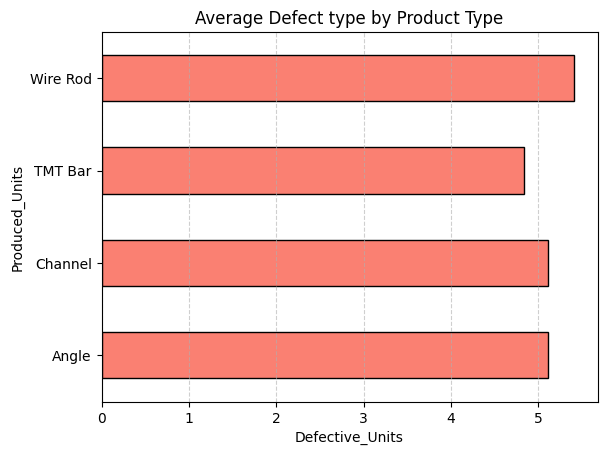

In [16]:
# Calculate defect percentage
import matplotlib.pyplot as plt
df['Defect_Type']=(df['Defective_Units'] / df['Produced_Units']) * 100

# Average defect rate per product
defect_by_product = df.groupby('Product_Type')['Defect_Type'].mean()
defect_by_product.plot(kind='barh', color='salmon', edgecolor='black')
plt.title('Average Defect type by Product Type')
plt.xlabel('Defective_Units')
plt.ylabel('Produced_Units')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

**B) Downtime Trend over Time.**

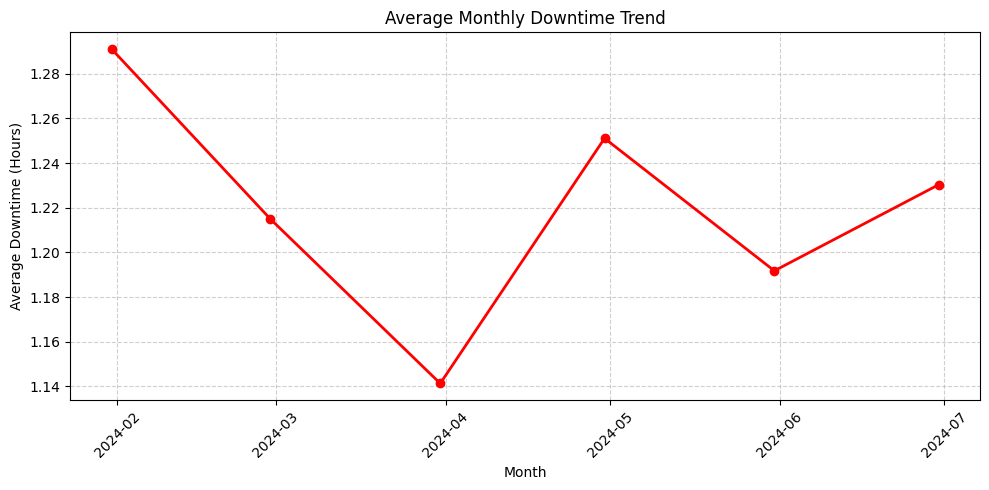

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load and prepare the data
df = pd.read_csv('tata.csv')

# Step 2: Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Set 'Date' as index for time-based resampling
df.set_index('Date', inplace=True)

# Step 4: Resample to get average monthly downtime (month-end frequency)
monthly_downtime = df.resample('ME')['Downtime_Hours'].mean()

# Step 5: Plot the downtime trend
plt.figure(figsize=(10, 5))
plt.plot(monthly_downtime.index, monthly_downtime.values, marker='o', color='red',linewidth=2)
plt.title('Average Monthly Downtime Trend')
plt.xlabel('Month')
plt.ylabel('Average Downtime (Hours)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**C) Inspection Results by Shift.**



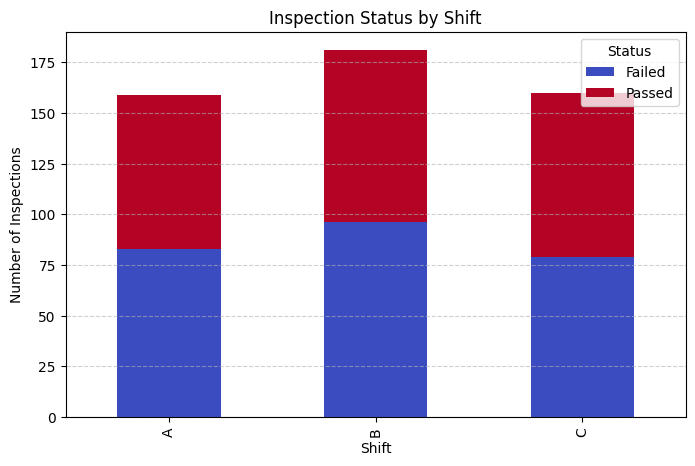

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load and prepare the data
df = pd.read_csv('tata.csv')
inspections = df.groupby(['Shift', 'Inspection_Status']).size().unstack(fill_value=0)

inspections.plot(kind='bar', stacked=True, figsize=(8,5), colormap='coolwarm')
plt.title('Inspection Status by Shift')
plt.xlabel('Shift')
plt.ylabel('Number of Inspections')
plt.legend(title='Status')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**D) Inspection Status Distribution (Passed vs Failed).**

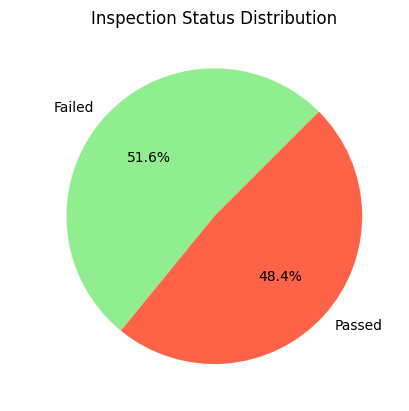

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load and prepare the data
df = pd.read_csv('tata.csv')
df['Inspection_Status'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['lightgreen','tomato'],startangle=45,
)
plt.title('Inspection Status Distribution')
plt.ylabel(" ")
plt.show()


**E) Quality & Production Insights.**





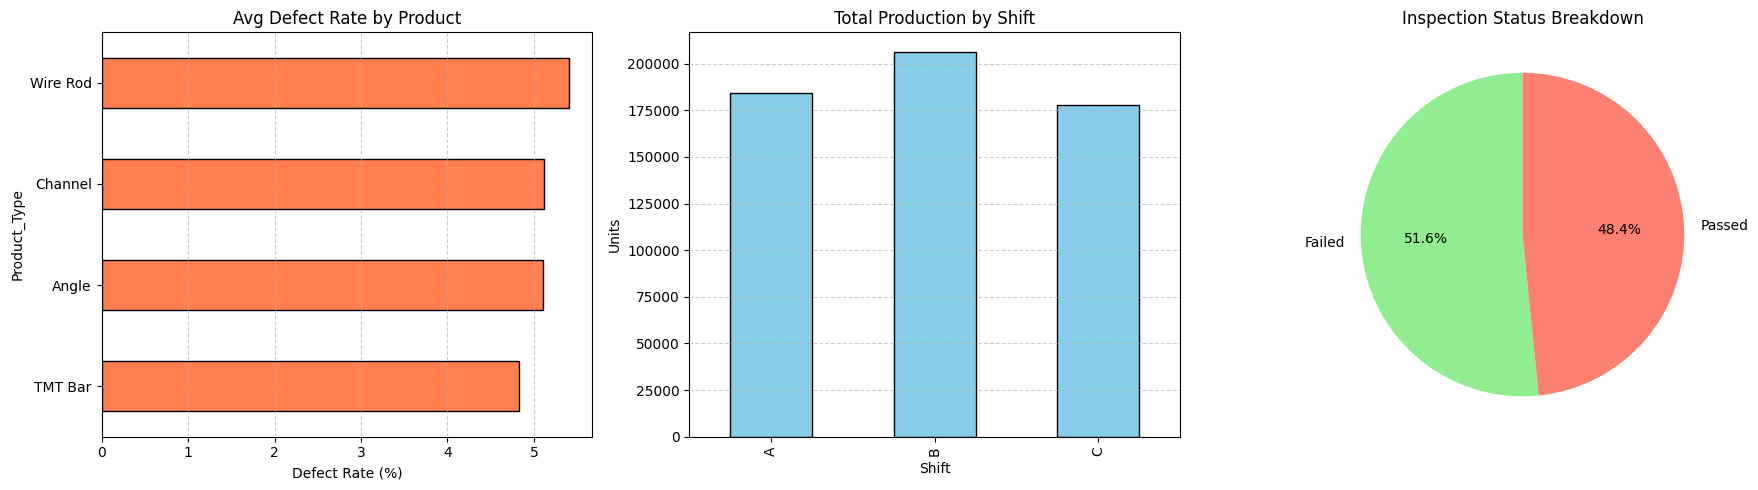

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Load & prepare your data
df = pd.read_csv('tata.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Create defect rate for analysis
df['defect_rate'] = (df['Defective_Units'] / df['Produced_Units']) * 100

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# --- Plot 1: Defect Rate by Product Type ---
df.groupby('Product_Type')['defect_rate'].mean().sort_values().plot(
    kind='barh',
    ax=axes[0],
    color='coral',
    edgecolor='black'
)
axes[0].set_title('Avg Defect Rate by Product')
axes[0].set_xlabel('Defect Rate (%)')
axes[0].grid(axis='x', linestyle='--', alpha=0.6)

# --- Plot 2: Total Produced Units by Shift ---
df.groupby('Shift')['Produced_Units'].sum().plot(
    kind='bar',
    ax=axes[1],
    color='skyblue',
    edgecolor='black'
)
axes[1].set_title('Total Production by Shift')
axes[1].set_ylabel('Units')
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

# --- Plot 3: Inspection Outcome Pie Chart ---
df['Inspection_Status'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    ax=axes[2],
    colors=['lightgreen', 'salmon']
)
axes[2].set_title('Inspection Status Breakdown')
axes[2].set_ylabel('')

# Final layout adjustments
plt.tight_layout()
plt.show()

**E) Machine Usage Frequency.**

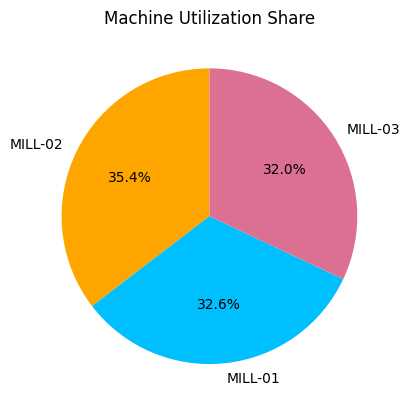

In [61]:
df['Machine_ID'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['orange', 'deepskyblue', 'palevioletred'],

)
plt.title('Machine Utilization Share')
plt.ylabel('')
plt.show()
